In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [49]:

# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')


In [50]:
# Check for missing values
print(df.isnull().sum())

# Check dataset info
print(df.info())

# Display first few rows
print(df.head())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: 

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
# Separate features (X) and target variable (y)
X = df.drop(columns='Outcome')  # Assuming 'Outcome' is the target
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.65      0.65      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

[[85 18]
 [18 33]]


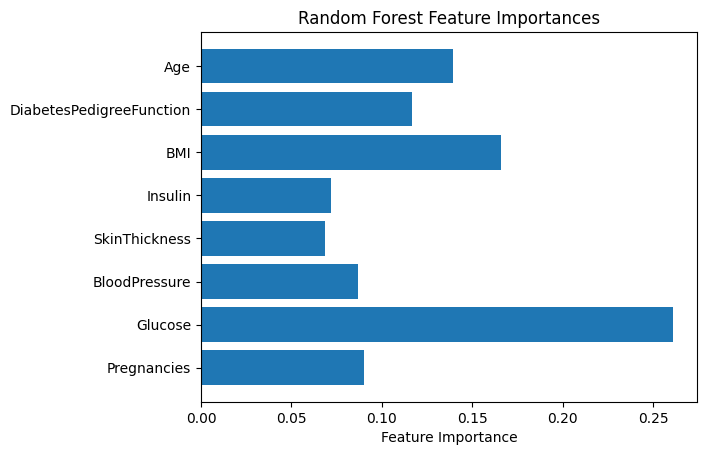

In [54]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot feature importances
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [55]:
#comparing the RF model with NB model 
    
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7532467532467533


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.65      0.65      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.7

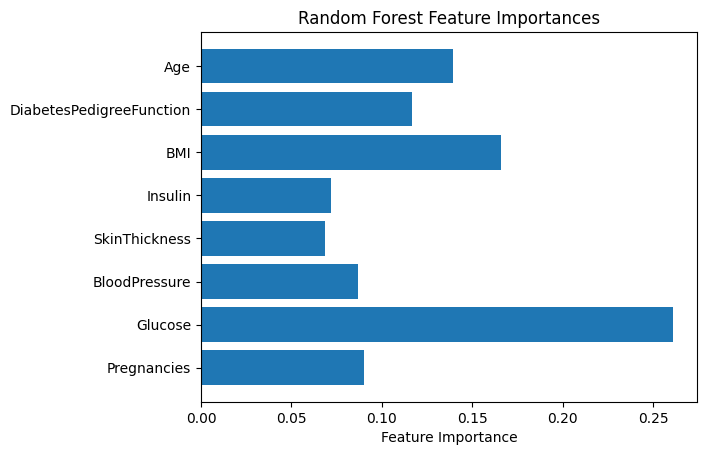

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric values using Label Encoding (for ordinal data)
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# If there are nominal columns, you can use One-Hot Encoding
# df = pd.get_dummies(df, drop_first=True)  # Uncomment if needed for nominal data

# Check the transformed data
print(df.head())

# Separate features (X) and target variable (y)
X = df.drop(columns='Outcome')  # Assuming 'Outcome' is the target variable
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


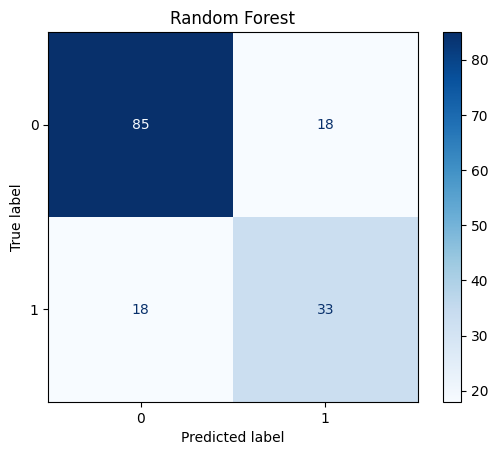

       Accuracy  Recall (Sensitivity)  Specificity  Precision  F1 Score
Value  0.766234              0.647059     0.825243   0.647059  0.647059


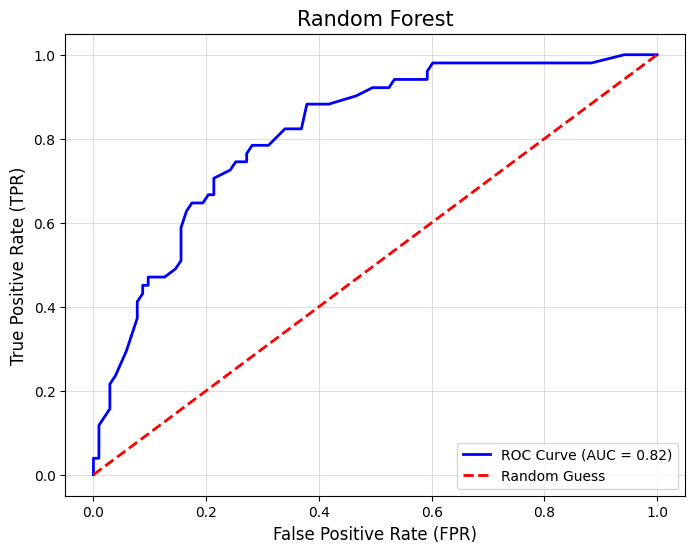

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest")
plt.grid(False)
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)  # Sensitivity
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

metrics = {
    "Accuracy": accuracy,
    "Recall (Sensitivity)": recall,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1
}
metrics_df = pd.DataFrame(metrics, index=["Value"])
print(metrics_df)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Random Forest", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()